<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Building a "Slack" Chatbot

_Authors: David Yerrington(SF) _

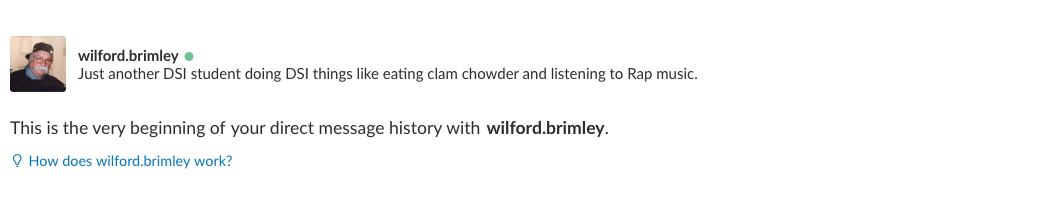

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Setup a Slack application from their developer portal
- Understand the basic "slackclient" API
  - Events
  - Messages
  - Users
- Getting your bot to respond to basic queries


# 1.1 Slack Bot Integration

Create a new "bot" here:
[New Bot](https://my.slack.com/services/new/bot)

## 1.2 Give your bot a name
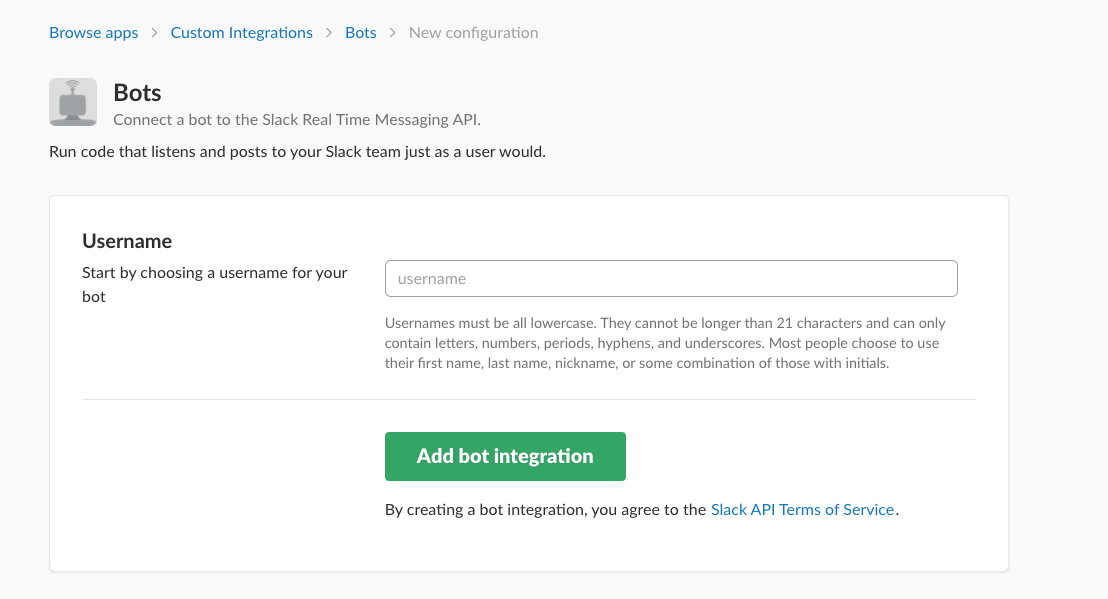

## 1.3 Customize your bot
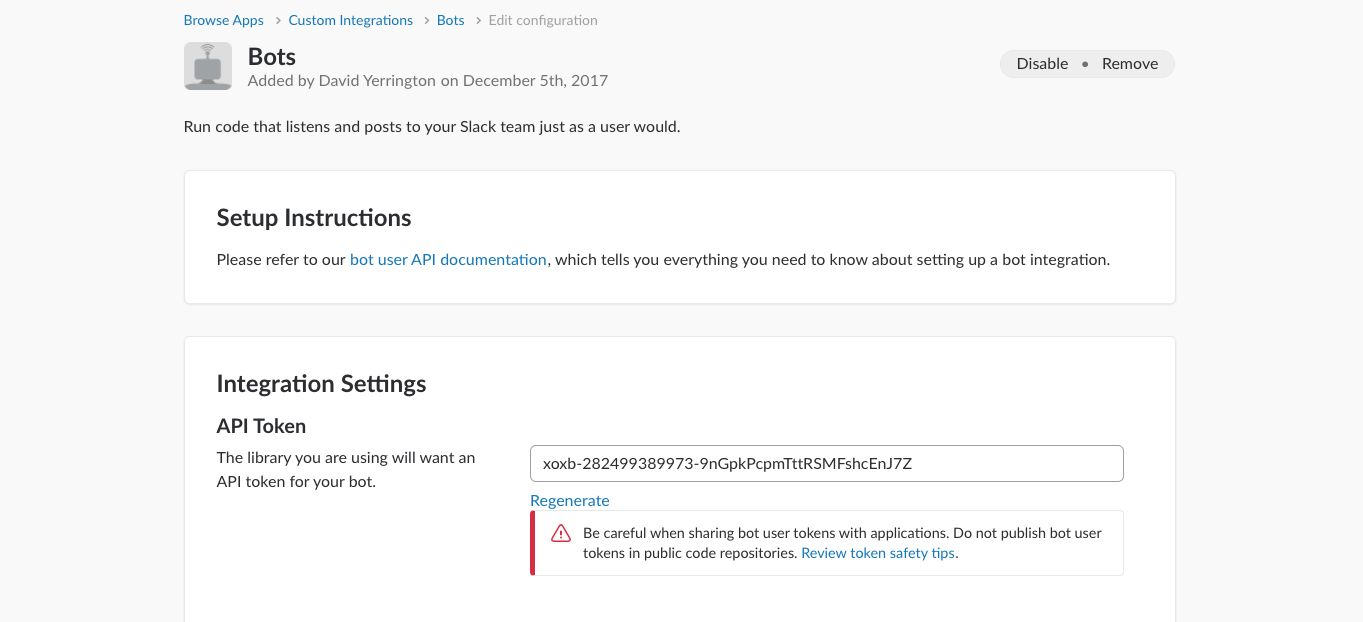

At this point you can customize the name, the avatar, and even description.  Make note of the API Token becuase we will need it later when we setup the Docker container.  You will plug this info into your Dockerfile in the near future.

# 2.1 Build your slackbot Docker container

Edit the Dockerfile in this repo, and plug in your bot's API Token from 1.3, and also give it the same name.

## 2.2 Run the build
The following will create a Docker container for the bot to run in:

```bash
docker build -t slackbot .
```

This will create a Docker container called "slackbot".

> As a future point of refernece, you can extend the packages using the requirements.txt for anything you may want to add to the container in terms of Python packages (ie: Pandas, sklearn, Keras, etc).

## 2.3 Run your first bot!!

Your bot will run in the background and it will reload whenever you make updates to run.py, which is the main file that handles all of the logic for how your bot can respond to messages.

<style>
@-webkit-keyframes blinker {
  from {opacity: 1.0;}
  to {opacity: 0.0;}
}
.blink{
	text-decoration: blink;
	-webkit-animation-name: blinker;
	-webkit-animation-duration: 0.6s;
	-webkit-animation-iteration-count:infinite;
	-webkit-animation-timing-function:ease-in-out;
	-webkit-animation-direction: alternate;
}
</style>

>### Docker Command
>```bash
docker run -v `pwd`:"/usr/src/app" slackbot python -u run.py
```
> _ctrl-c terminates your bot._ 
>
> **<span style="color: red;" class="blink"><blink>As tempting as it may be, reframe from inviting your bot to our DSI channel.  This could quickly get annoying.  We can play with our bots using private messages at first then we may invite it to a botnet channel in the near future.</blink></span>**

### Troubleshooting

- **Not seeing your bot?**  Double check that you have a bot setup at all.
- **Error on connection?**  Check your API key and bot name matches the configured bot from previous steps.

If you're not sure where to find your bot, check out [https://ga-students.slack.com/apps/manage/custom-integrations](https://ga-students.slack.com/apps/manage/custom-integrations) under "bots".

## Slackclient API

Slackclient is the official client authored by Slack itself.  The documents are really quite good and you can view them here: [Slackclient API Documentation](http://slackapi.github.io/python-slackclient/).

### What can you do with this API?

- Send messages
- Mine channel data
- List/Join/Create channels automatically
- Connect any of the above features to anything Python can do!
  - Check the weather
  - Email someone
  - ML Process / AI
  
In your console, you will see a real-time interaction between your Python script and the Slack service itself.  Each one of these messages is being handled by a function called `handle_message()`.  Each one of these message types can be looked at and responded by either writing Python code that runs another API call to send a message, or anything that Python can do.  For instance, a message can be sent to someone after their status has changed from "active" to "away" such as "HEY COME BACK HERE! WE'RE NOT DONE YET!?".

## From here we will talk about the code a little bit.
Open your editors and look at the file `run.py`.

### What does our bot do currently?

Our bot will patiently wait for someone to say "hi", then respond with a random response.  There are a few qualifiers that the bot is programmed to observe.  For one, it will not respond to anything unless the method `is_for_me()` returns `True`.

### Have a look at the method `is_for_me()`.  Can you think of why it might be important to use this method?

# Independent Practice

We are going to make our bots sassy.  They will respond when the sentiment of anything anyone directs at them is negative.  We will use basic "TextBlob" packages for this.

### 1. Add the packages "textblob" to a new line of your requirements.txt file, then rebuild your Docker container.
We only really install "slackclient" into our environment.  You can probably figure out how to add the line from here if you really wanted.  Otherwise just edit the requirements.txt file and add the line "textblob" to the end of it.  Rebuild your container.  Restart your bot.

> Don't forget to import the appropriate modules into `run.py` to use TextBlob!

In [7]:
!cat Docker/requirements.txt

slackclient


### 2. Research how to use "textblob"  using the power of your mind.
http://textblob.readthedocs.io/en/dev/quickstart.html

### 3. Implement a method that will check the sentiment of any message directed at your bot.

- If the sentiment polarity is > -.5, have your bot respond with "That's harsh {username}!".
- If the sentiment polarity is < .5, have your bot respond with "How nice {username}!".
- All other responses reply with the polarity to check it.

## BONUS 4. Install wordnet and have to bot respond with word defintions.

Read up on this in the TextBlob documenation quickstart.  When your bot is addressed in a channel with "@botname define regression", have it respond with the given definitions found from the Wordnet object.

- Check to see if the word "define" is pressent in the message directed at your bot
- Somehow capture the word(s) after the word "define"
- Look it up using the Wordnet method in Textblob
- Have it respond to the channel (NOT in our DSI channel please! Test in the channel dsi-botnet).

> Hint:`python -m nltk.downloader wordnet` 
>
> Somehow, install Wordnet to your container and/or rebuild your Docker container to do this.

### Where to go from here.

#### LSTM
- https://github.com/fchollet/keras/blob/master/examples/lstm_text_generation.py
- https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

#### Dynamic Memory Network Reponse
- https://www.youtube.com/watch?v=t5qgjJIBy9g
- https://github.com/llSourcell/How_to_make_a_chatbot
- https://github.com/ethancaballero/Improved-Dynamic-Memory-Networks-DMN-plus

#### Seq2Seq
- [End-to-end Adversarial Learning for Generative Conversational Agents](https://arxiv.org/abs/1711.10122v2)
- https://github.com/oswaldoludwig/Seq2seq-Chatbot-for-Keras